In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import losses
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss', marker=".")
    #plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [4]:
x = []
y = []
for i in range(1, 200):
    raw_data = np.load(f'data/test_carbon/{i}.npz')
    x.append(np.concatenate((raw_data["n_s"]/max(raw_data["n_s"]), raw_data["n_d"]/max(raw_data["n_d"])), axis=0))
    y.append(raw_data["a"])

In [8]:
x = np.array(x)
#factor = max(y)
#y = np.array(y) / factor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=len(x_train[0], )),
        layers.Dense(400, activation='relu'),
        layers.Dense(200, activation='relu'),
        layers.Dense(537, activation='relu'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               464400    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 537)               107937    
                                                                 
Total params: 652537 (2.49 MB)
Trainable params: 652537 (2.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
             loss="mean_absolute_error")

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 0.2788
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2542
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2431
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2346
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 0.2277
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 0.2205
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2151
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - loss: 0.2097
Epoch 9/100
2/2 [==============================] - 0s 30ms/step - loss: 0.2037
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1991
Epoch 11/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1942
Epoch 12/100
2/2 [==============================] - 0s 10ms/step - loss: 0.1897
Epoch 13/100
2/2 [==============================] 

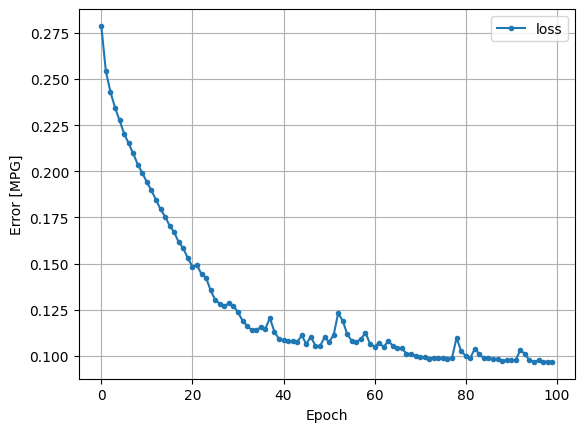

In [11]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=100, batch_size=100, shuffle=True)
plot_loss(history)

In [12]:
accuracy = model.evaluate(x_test, y_test, verbose=0)
accuracy

ValueError: Data cardinality is ambiguous:
  x sizes: 66
  y sizes: 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537
Make sure all arrays contain the same number of samples.

In [13]:
res = model.predict(np.array(x_test))

3/3 [==============================] - 0s 2ms/step


In [14]:
i = 1
res[i][0], y_test[i]

(0.1513641,
 array([1.10351884e-001, 1.12111188e-001, 1.13964415e-001, 1.15933391e-001,
        1.18061498e-001, 1.20439452e-001, 1.23254958e-001, 1.26890270e-001,
        1.32096148e-001, 1.40278807e-001, 1.53916679e-001, 1.77042907e-001,
        2.15575804e-001, 2.76980532e-001, 3.68539692e-001, 4.93573998e-001,
        6.45936095e-001, 8.05117020e-001, 9.36363154e-001, 1.00000000e+000,
        9.69145923e-001, 8.46816867e-001, 6.69077432e-001, 4.88424305e-001,
        3.47336239e-001, 2.61442061e-001, 2.21898251e-001, 2.10238925e-001,
        2.11192340e-001, 2.16572504e-001, 2.23298749e-001, 2.30542876e-001,
        2.38155392e-001, 2.46122031e-001, 2.54450217e-001, 2.63144655e-001,
        2.72213676e-001, 2.81659940e-001, 2.91481087e-001, 3.01673779e-001,
        3.12231210e-001, 3.12231210e-001, 3.12231210e-001, 3.12231210e-001,
        3.12231210e-001, 3.12231210e-001, 3.12231210e-001, 3.12231210e-001,
        3.12231210e-001, 3.12231210e-001, 3.12231210e-001, 3.12231210e-001,


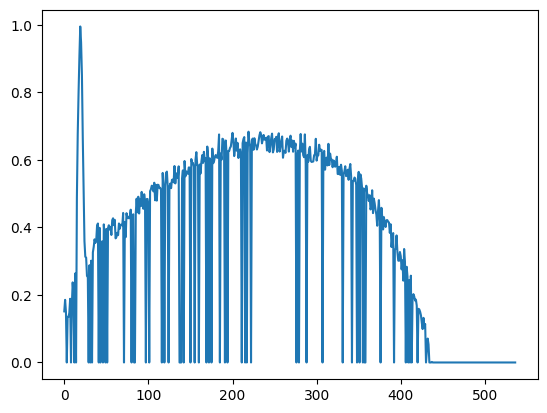

In [17]:
plt.plot(res[i])
plt.show()